## Get the Decision path for the leaf Nodes - Random Forest (scikit)

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

# Load the library with the iris dataset
from sklearn.datasets import load_iris

# Load scikit's train-test split function
from sklearn.cross_validation import train_test_split

# Random Forest Classifier - not the 'Extra Trees Classifier'
from sklearn.ensemble import RandomForestClassifier

# Confusion Matrix
from sklearn.metrics import confusion_matrix

import numpy as np

# Set seed for reproducibility
np.random.seed(1015)

### Load the iris data

* Load the data - check the dimensions
* Create the train-test datasets and check the dimensions

In [20]:
iris = load_iris()

print(iris.keys())
print("Iris Feature dimensions", iris.data.shape, sep = ":\n")
print("Iris Data output", iris.target, sep = ":\n")
print("Iris Output dimensions", iris.target.shape, sep = ":\n")

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Iris Feature dimensions:
(150, 4)
Iris Data output:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Iris Output dimensions:
(150,)


In [22]:
# Create the train-test datasets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [24]:
print("Training feature data dimensions", X_train.shape, sep = ":\n")
print("Training target data dimensions", y_train.shape, sep = ":\n")
print("Test feature data dimensions", X_test.shape, sep = ":\n")
print("Test target data dimensions", y_test.shape, sep = ":\n")

Training feature data dimensions:
(112, 4)
Training target data dimensions:
(112,)
Test feature data dimensions:
(38, 4)
Test target data dimensions:
(38,)


*Everything looks to be in order!* - Let's keep going

### Fit the Random Forest classifier - minimal number of trees

* Note that we are not going to fit the `ExtraTreesClassifier` at this stage - but we will come back to it
* Just use **2** trees to fit the random forest, we want to display them later and then manually use them as a check for the decision paths

In [33]:
np.random.seed(1039)

rf = RandomForestClassifier(n_estimators = 2)
rf.fit(X = X_train, y = y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [40]:
predicted = rf.predict(X = X_test)
predicted

array([0, 2, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 1, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1])

In [38]:
rf.score(X = X_test, y = y_test)

0.97368421052631582

In [41]:
confusion_matrix(y_true = y_test, y_pred = predicted)

array([[15,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  9]])

### Some Comments

* The accurracy is 0.97 using just 2 trees - looks good
* However it is very sensitive to the random seed value - not good!
* With more trees, we expect the sensistivity to the random seed value to decrease (should not need it as a source of randomness)
* We are still free to continue with this example

### Get the Feature Importances

* This can be readily derived from the fitted random forest classifier

In [63]:
importances = rf.feature_importances_
std         = np.std([tree.feature_importances_ for tree in rf.estimators_]
                      , axis = 0)

# Get the indices of the features with highest importances in descending order
indices     = np.argsort(importances)[::-1]

In [64]:
print("Indices in Descending order of feature importance", indices, sep = ":\n")
print([iris.feature_names[idx] for idx in indices])

Indices in Descending order of feature importance:
[3 2 0 1]
['petal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'sepal width (cm)']


Feature ranking:
1. feature 3 (0.655615)
2. feature 2 (0.307534)
3. feature 0 (0.027917)
4. feature 1 (0.008934)


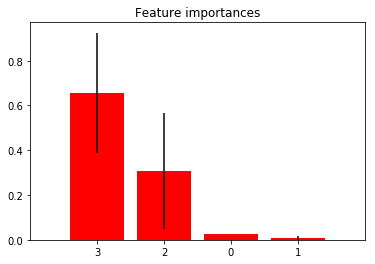

In [65]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [70]:
print("Display feature importance scores", importances, sep = ":\n")
print("Check that the importance scores are standardized to 100%", sum(importances), sep = ":\n")

Display feature importance scores:
[ 0.02791717  0.00893356  0.30753384  0.65561543]
Check that the importance scores are standardized to 100%:
1.0


In [104]:
from inspect import getmembers
import pprint
#pp = pprint.PrettyPrinter(indent=4)
#for tree in rf.estimators_:    
    #print(tree.tree_.feature)
    #pp.pprint(getmembers(tree.tree_))

In [80]:
# from sklearn import tree
# i_tree = 0
# for tree_in_forest in rf.estimators_:
#     with open('figures/03_Decision_Paths_Leaf_Nodes/tree_' + str(i_tree) + '.png', 'w') as my_file:
#         my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
#     i_tree = i_tree + 1

In [96]:
from IPython.display import display, Image
import pydotplus
def draw_tree(inp_tree
              , out_file = None
              , filled=True
              , rounded=True
              , special_characters=True):
    dot_data = tree.export_graphviz(inp_tree
                                    , out_file = out_file
                                    , filled   = filled
                                    , rounded  = rounded
                                    , special_characters = special_characters)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    img = Image(graph.create_png())
    display(img)

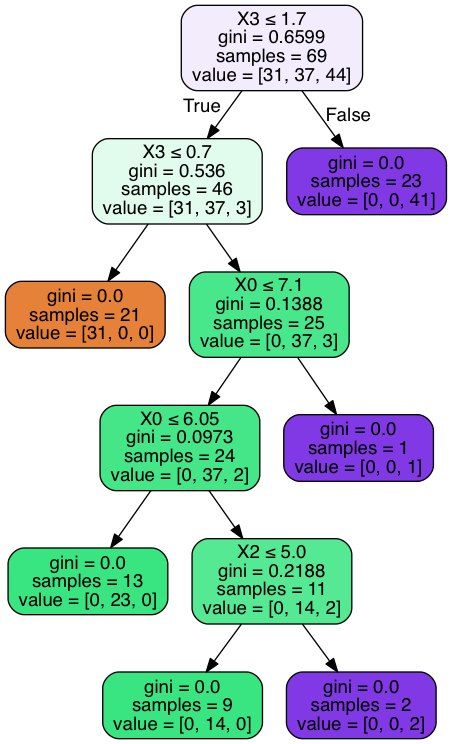

[ 3  3 -2  0  0 -2  2 -2 -2 -2 -2]


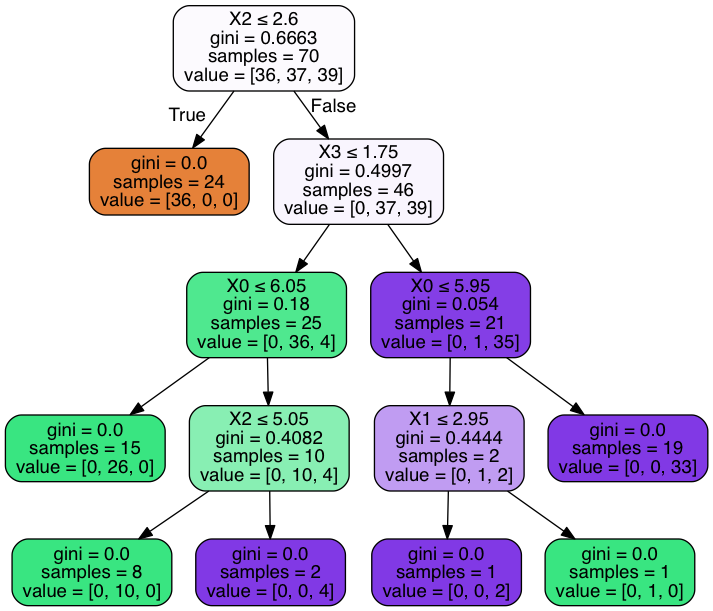

[ 2 -2  3  0 -2  2 -2 -2  0  1 -2 -2 -2]


In [98]:
for dtree in rf.estimators_:
#    dot_data = tree.export_graphviz(dtree
#                                    , out_file = None
#                                    , filled   = True
#                                    , rounded  = True
#                                    , special_characters = True)  
#    graph = pydotplus.graph_from_dot_data(dot_data)  
#    img = Image(graph.create_png())
#    display(img)
    draw_tree(inp_tree = dtree)
    print(dtree.tree_.feature)

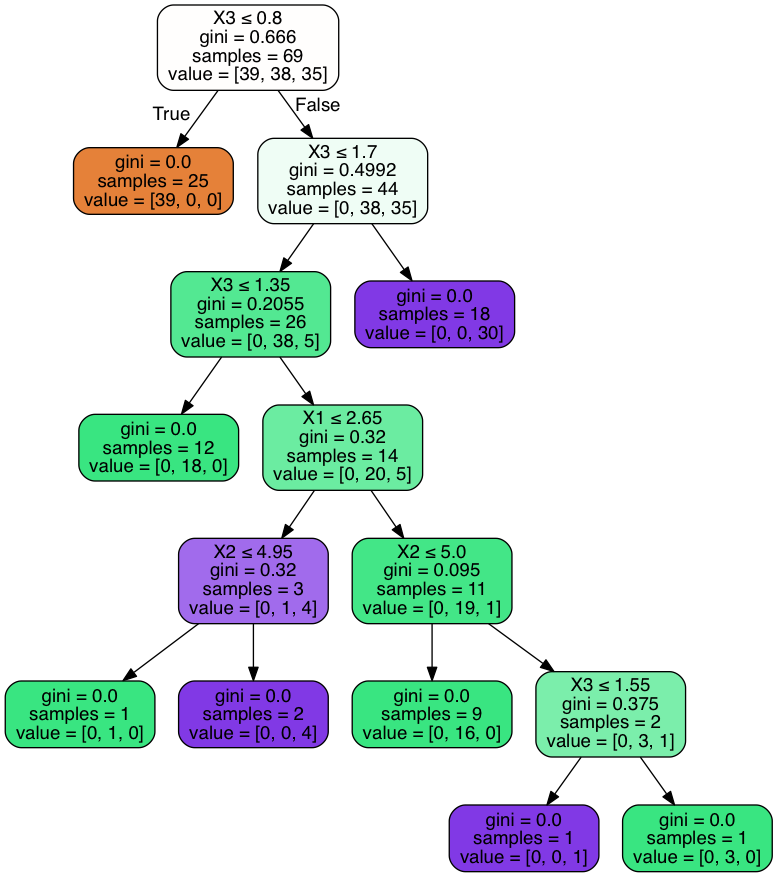

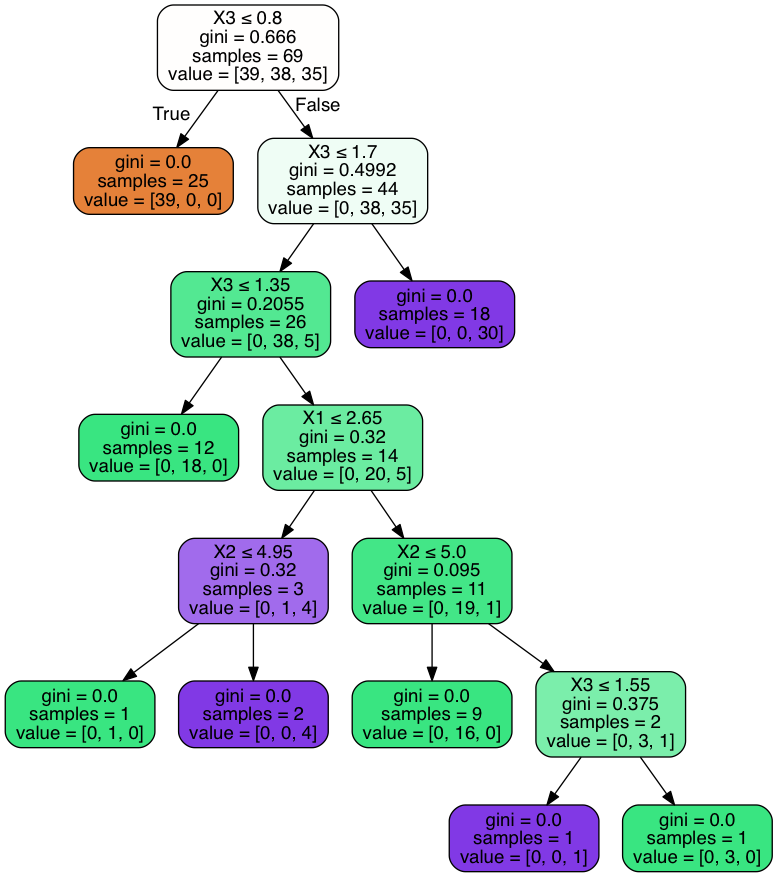

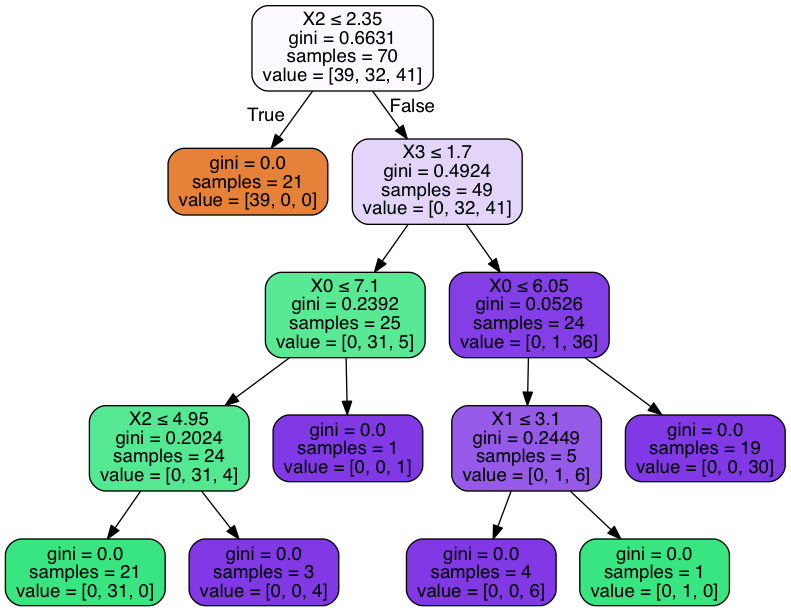

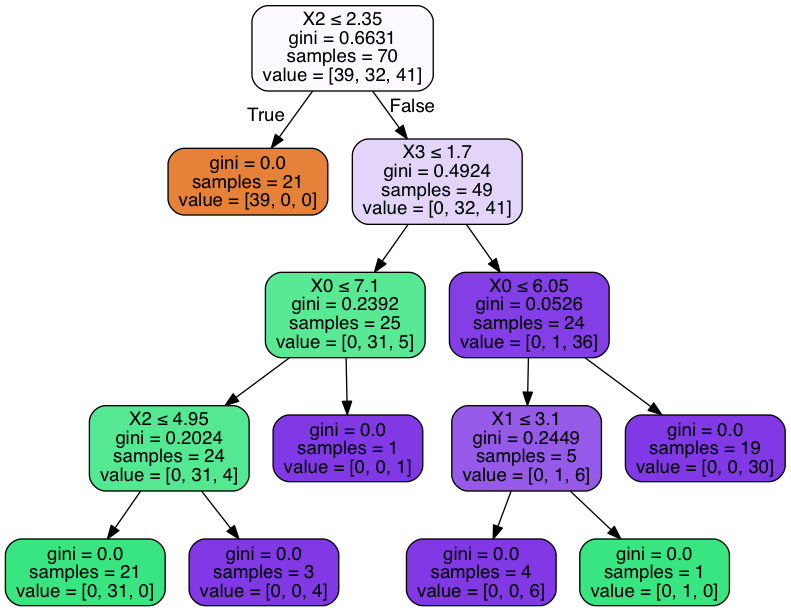

In [106]:
# Setup
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
# Set seed for reproducibility
np.random.seed(1015)

# Load the iris data
iris = load_iris()

# Create the train-test datasets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

np.random.seed(1039)

# Just fit a simple random forest classifier with 2 decision trees
rf = RandomForestClassifier(n_estimators = 2)
rf.fit(X = X_train, y = y_train)

# Define a function to draw the decision trees in IPython
# Adapted from: http://scikit-learn.org/stable/modules/tree.html
from IPython.display import display, Image
import pydotplus
    
# Now plot the trees individually
for dtree in rf.estimators_:
    dot_data = tree.export_graphviz(dtree
                                    , out_file = None
                                    , filled   = True
                                    , rounded  = True
                                    , special_characters = True)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    img = Image(graph.create_png())
    display(img)
    draw_tree(inp_tree = dtree)
    #print(dtree.tree_.feature)